# 8K Filing Event Type Classification & Analysis

## 1. Doc Download

In [2]:
import numpy as np
import pandas as pd
from sec_edgar_downloader import Downloader
dl = Downloader('data/')

### Transform and Extract CIK Codes for NYSE Tickers

In [38]:
df = pd.read_csv('cik_ticker.csv', sep='|')

In [39]:
df.head()

,CIK,Ticker,Name,Exchange,SIC,Business,Incorporated,IRS
0,1090872,A,Agilent Technologies Inc,NYSE,3825.0,CA,DE,770518772.0
1,4281,AA,Alcoa Inc,NYSE,3350.0,PA,PA,250317820.0
2,1332552,AAACU,Asia Automotive Acquisition Corp,NaN,6770.0,DE,DE,203022522.0
3,1287145,AABB,Asia Broadband Inc,OTC,8200.0,GA,NV,721569126.0
4,1024015,AABC,Access Anytime Bancorp Inc,NaN,6035.0,NM,DE,850444597.0


In [40]:
df.Exchange = df.Exchange.astype(str)

In [41]:
df.shape

(13737, 8)

In [42]:
df = df[(df['Exchange'] == 'NYSE')]

In [43]:
df.shape

(2880, 8)

In [44]:
df.drop(columns=['Business', 'Incorporated', 'IRS'], inplace=True)

In [45]:
df = df.reset_index(drop=True)

In [46]:
df.head()

,CIK,Ticker,Name,Exchange,SIC
0,1090872,A,Agilent Technologies Inc,NYSE,3825.0
1,4281,AA,Alcoa Inc,NYSE,3350.0
2,706688,AAN,Aarons Inc,NYSE,7359.0
3,1158449,AAP,Advance Auto Parts Inc,NYSE,5531.0
4,1500217,AAT,American Assets Trust Inc,NYSE,6798.0


In [47]:
df.CIK = df.CIK.astype(str)

In [48]:
df['CIK'] = df['CIK'].str.zfill(10)

In [49]:
df.head()

,CIK,Ticker,Name,Exchange,SIC
0,0001090872,A,Agilent Technologies Inc,NYSE,3825.0
1,0000004281,AA,Alcoa Inc,NYSE,3350.0
2,0000706688,AAN,Aarons Inc,NYSE,7359.0
3,0001158449,AAP,Advance Auto Parts Inc,NYSE,5531.0
4,0001500217,AAT,American Assets Trust Inc,NYSE,6798.0


In [19]:
for i in df4.index:
    dl.get("8-K", df4.CIK[i], after_date="20080101", include_amends=True)

HTTPError: 503 Server Error: Service Unavailable for url: https://www.sec.gov/Archives/edgar/data/33213/000115752311006031/0001157523-11-006031.txt

## Text Extraction

In [1]:
## Standard
import os, re, sys, time

## Data handling
import pandas as pd
import numpy as np

## "Web scraping" and HTML
import requests
import lxml.html
from bs4 import BeautifulSoup

import pickle

In [4]:
def extract_text():

    list_of_dicts = []

    directory = r'C:\Users\(User_Name)\data\sec_edgar_filings'

    for subdir, dirs, files in os.walk(directory):
        for file in files:
            try:
                path = r'%s' % (subdir+'\\'+file)
                with open(str(path)) as inp:

                    doc_dict = {}
                    doc = inp.read()
                    doc_date = None
                    doc_item = None
                    doc_body = None
                    summary_index = None

                    soup = BeautifulSoup(doc, 'html.parser')

                    date = soup.find('acceptance-datetime')
                    date_text = 'CONFORMED PERIOD OF REPORT'
                    for line in str(date).splitlines():
                        if date_text in line:
                            doc_date = line[-8:]

                    body = soup.find('document').find('text').find_all('font')
                    pattern = '^[Ii][Tt][Ee][Mm]\s\d*(?=\.)'
                    for index, tag in enumerate(body):
                        word = re.search(pattern, tag.get_text())
                        if word:
                            doc_item = word.group(0)
                            item_index = index
                            summary_index = item_index + 1
                            doc_body = body[summary_index].get_text().strip()
                            if len(doc_body) == 0:
                                summary_index = summary_index + 1
                                doc_body = body[summary_index].get_text().strip()
                            break

                    doc_dict['date'] = doc_date
                    doc_dict['file'] = path[-24:-14]
                    doc_dict['item'] = doc_item
                    doc_dict['body'] = doc_body
                    list_of_dicts.append(doc_dict)
            except:
                print(f"Error occurred with {file}")
            
    return list_of_dicts

In [5]:
test_dict = extract_text()

C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![`)R3$,KE$*TW``7[`'
  warnings.warn(msg)


Error occurred with 0001045450-15-000026.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'DUU' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-11-200803.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![1U3G[4W65F_RU_LI_'
  warnings.warn(msg)


Error occurred with 0001193125-11-292806.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'J' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-08-107889.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'P' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-11-212557.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![`2&K6+<9ZG46)P\nM?'
  warnings.warn(msg)


Error occurred with 0001193125-13-372124.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'Q' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-12-344175.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at "<![07MN%'A9)FFC:N1A("
  warnings.warn(msg)


Error occurred with 0001193125-10-030076.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'G1' in marked section
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'A' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-11-342323.txt
Error occurred with 0001193125-12-007972.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![7VNZ+T"6S#?>4,#)0'
  warnings.warn(msg)


Error occurred with 0000950123-11-066080.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![^XDBDBM9VC:$2#:S$'
  warnings.warn(msg)


Error occurred with 0001193125-11-352621.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![`4444`-)Y[T;OK7D6'
  warnings.warn(msg)


Error occurred with 0001193125-14-083427.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![]2M(;*Y:W#2 F1)$&'
  warnings.warn(msg)


Error occurred with 0001104659-18-037193.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![`+BO`9FM%M^M!$`T?'
  warnings.warn(msg)


Error occurred with 0000950123-11-014063.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![;-CMBN6@K;16N\\"#V'
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'G' in marked section
  warnings.warn(msg)


Error occurred with 0000950123-11-092549.txt
Error occurred with 0000950123-11-099232.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![[S6N/)FU=P1&-E5IE'
  warnings.warn(msg)


Error occurred with 0001289308-20-000013.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![_!2\\\\B(YRV7X.VFZX'
  warnings.warn(msg)


Error occurred with 0001193125-08-023933.txt
Error occurred with 0001140361-13-031173.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'XB9TU' in marked section
  warnings.warn(msg)


Error occurred with 0001367644-08-000007.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'B' in marked section
  warnings.warn(msg)


Error occurred with 0001367644-08-000085.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'XS7FFIN-9U' in marked section
  warnings.warn(msg)


Error occurred with 0001104659-11-051313.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![6)A=8\\_*_ZS`P,^O`'
  warnings.warn(msg)


Error occurred with 0001104659-11-059613.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'UCZ' in marked section
  warnings.warn(msg)


Error occurred with 0001104659-13-047529.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![7&B\\(W"M;2R"VZ3L3'
  warnings.warn(msg)


Error occurred with 0001193125-10-188943.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![%E8PA2]4`1LG\nMOXD'
  warnings.warn(msg)


Error occurred with 0000950123-10-073341.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'BUEC3' in marked section
  warnings.warn(msg)


Error occurred with 0001437749-13-001240.txt
Error occurred with 0001437749-13-001817.txt
Error occurred with 0001437749-13-002889.txt
Error occurred with 0001437749-13-002953.txt
Error occurred with 0001437749-13-004483.txt
Error occurred with 0001437749-13-009077.txt
Error occurred with 0001104659-19-020690.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'Y8E\n' in marked section
  warnings.warn(msg)


Error occurred with 0001104659-20-062912.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'M' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-16-682002.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'E8Z' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-17-037316.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![4R`\\`/>&\\/\nM<>=C9'
  warnings.warn(msg)


Error occurred with 0000031978-12-000041.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'FD' in marked section
  warnings.warn(msg)


Error occurred with 0000031978-14-000016.txt
Error occurred with 0000031978-14-000026.txt
Error occurred with 0000031978-14-000040.txt
Error occurred with 0000031978-15-000017.txt
Error occurred with 0000031978-15-000029.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'FD ' in marked section
  warnings.warn(msg)


Error occurred with 0000031978-16-000066.txt
Error occurred with 0000031978-16-000086.txt
Error occurred with 0000031978-16-000092.txt
Error occurred with 0000031978-16-000101.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'F' in marked section
  warnings.warn(msg)


Error occurred with 0001144204-12-025137.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![8!YYC0`#D<0[Z=(EA'
  warnings.warn(msg)


Error occurred with 0001104659-14-039865.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![!.#1*0SG8&-XBP"#;'
  warnings.warn(msg)


Error occurred with 0001104659-16-145354.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![)L?OS@,,%8WT>MF?9'
  warnings.warn(msg)


Error occurred with 0000821189-10-000004.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'I' in marked section
  warnings.warn(msg)


Error occurred with 0000837465-18-000012.txt
Error occurred with 0000837465-18-000026.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![,/\\ &F?$O1_AC=W&\n'
  warnings.warn(msg)


Error occurred with 0001193125-17-247711.txt
Error occurred with 0001193125-10-208579.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![:][O:S>[\\])3G](QL'
  warnings.warn(msg)


Error occurred with 0001193125-11-328998.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![6_P!7\nM]]8OU8L/KX'
  warnings.warn(msg)


Error occurred with 0001193125-12-383366.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'N' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-13-158578.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at "<![57G'7;*3KJ'6[&K8V"
  warnings.warn(msg)


Error occurred with 0000895417-17-000006.txt
Error occurred with 0000895417-17-000068.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'Z' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-13-075860.txt
Error occurred with 0001193125-13-088850.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'M\n' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-13-438462.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'C7' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-14-114579.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'U' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-18-061118.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'Z058' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-19-076730.txt


C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'KUMT' in marked section
  warnings.warn(msg)


Error occurred with 0000915389-20-000029.txt


In [6]:
df_8k = pd.DataFrame(test_dict)

In [7]:
df_8k.tail()

,date,file,item,body
7572,20131018,0001104659,Item 1,This Current Report on Form 8-K/A is being fil...
7573,20131115,0001104659,Item 8,Other Events.
7574,20131219,0001104659,Item 8,Other Events.
7575,20140218,0001104659,Item 1,"On February 18, 2014, Edison Mission Energy (“..."
7576,20140311,0001104659,Item 1,Bankruptcy or Receivership


In [8]:
df_8k.shape

(7577, 4)

In [9]:
df_8k.to_pickle("df_A.pkl")

## Clean Dataframe & Tokenize Text

In [2]:
import re
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\nqabe\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [3]:
df_A = pd.read_pickle("df_A.pkl")

In [4]:
df_A['date'] =  pd.to_datetime(df_A['date'], format='%Y%m%d')
df_A.head()

,date,file,item,body
0,2008-04-28,0000909518,None,None
1,2008-08-21,0000909518,ITEM 5,"(a) On August 21, 2008, the Board of Direc..."
2,2008-10-30,0000909518,Item 1,Underwriting Agreement
3,2008-11-07,0000909518,Item 9,(d)
4,2009-03-12,0000909518,None,None


In [5]:
df_A.dropna(inplace=True)

In [6]:
df_A.shape

(4895, 4)

In [7]:
df_A.item = df_A.item.apply(lambda x: re.sub('\\n', ' ', x))

In [8]:
df_A.item = df_A.item.apply(lambda x: x[5:])

In [9]:
df_A.reset_index(inplace=True)

In [10]:
df_A.item.value_counts()

2    1621
5    1060
7     825
1     629
8     602
9     112
3      33
4      13
Name: item, dtype: int64

In [11]:
for i in df_A.index:
    if len(df_A['body'][i]) < 200:
        df_A.drop(index=i, inplace=True)
df_A.shape

(2026, 5)

In [12]:
df_A.head()

,index,date,file,item,body
6,10,2010-05-25,0000909518,8,"On May\n25, 2010, The Estée Lauder Companies I..."
7,11,2010-11-09,0000909518,5,"(e) On November 9, 2010, the stockho..."
8,12,2010-11-09,0000909518,5,We held our Annual Meeting of Stockholders on ...
9,13,2010-11-09,0000909518,5,"On February 9, 2011, The Estée Lauder Companie..."
11,15,2011-04-05,0000909518,1,"On April6, 2011, Estee Lauder Inc. (“ELI”), a ..."


In [14]:
with open('fin_stopwords.txt') as txt:
    fin_stopwords = txt.read().splitlines()
fin_stopwords

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [15]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

def spacy_tokenizer(text):
    
    # Create our list of punctuation marks
    punctuations = string.punctuation

    # Create our list of stopwords
    nlp = spacy.load('en_core_web_sm')
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Adding words to remove in addition to stopwords
    add_stopwords = fin_stopwords
    
    # remove numbers and special characters
    pattern = '[0-9]'
    cleantext = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleantext2 = re.sub(pattern, '', cleantext)
    
    # remove html tags
    html = re.compile('<.*?>')
    cleantext3 = re.sub(html, '', cleantext2)
    
    # Creating token object
    doc = nlp(cleantext3)

    entity_list = []
    for token in list(doc.ents):
        entities = str(token).split(' ')
        for word in entities:
            entity_list.append(word)
    tokens = [word for word in doc if word.text not in entity_list]

    # Lemmatizing each token and converting each token into lowercase
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]

    # Removing stop words
    tokens = [ word for word in tokens if word not in stop_words and word not in punctuations ]
    
    # Removing custom set of terms
    tokens = [ word for word in tokens if word not in add_stopwords ]

    # remove words with less than 3 characters
    tokens = [ word for word in tokens if len(word) > 2 ]

    # return preprocessed list of tokens
    return tokens

## Vectorizing Words & Bigrams

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [67]:
cv = CountVectorizer(tokenizer=spacy_tokenizer, max_df=0.7, min_df=0.02, ngram_range = (1,2), stop_words='english')

In [68]:
dtm = cv.fit_transform(df_A['body'])

## Model Cross Validation & Fit

In [73]:
from sklearn.decomposition import LatentDirichletAllocation

In [74]:
# Build LDA Model with GridSearch params
lda_model = LatentDirichletAllocation(n_components=15,            # Number of topics
                                      learning_decay=0.7,         
                                      max_iter=50,                # Max learning iterations
                                      learning_method='online',   
                                      random_state=42,            # Random state
                                      batch_size=500,             # n docs in each learning iter
                                      evaluate_every = -1,        # compute perplexity every n iters, default: Don't
                                      n_jobs = -1)                # Use all available CPU

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=500, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=15, n_jobs=-1,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [75]:
lda_output = lda_model.fit_transform(dtm)

In [76]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(dtm))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(dtm))

# See model parameters
print(lda_model.get_params())

Log Likelihood:  -293508.65742066805
Perplexity:  92.5526466092964
{'batch_size': 500, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 50, 'mean_change_tol': 0.001, 'n_components': 15, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


## GridSearch to Identify Best Model Params

In [77]:
from sklearn.model_selection import GridSearchCV


# Define Search Param
search_params = {'n_components': [10, 15, 20],'learning_decay': [.3, .5, .7]}

# Init the Model
lda = LatentDirichletAllocation(max_iter=50, batch_size=500, learning_method='online')

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, cv=3, verbose=2, n_jobs = -1)

# Do the Grid Search
model.fit(dtm)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=500,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=50,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total_

In [78]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(dtm))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -121018.81142639734
Model Perplexity:  105.33941748491104


## Explore Topic Modeling Outputs

In [79]:
lda_model.components_

array([[ 6.03624204,  0.06899072, 28.19129965, ...,  0.06668322,
         0.06667783,  0.06667698],
       [ 0.06668752,  0.06667693,  0.06668094, ...,  0.06667819,
         0.0669051 ,  0.06678443],
       [ 0.06668589,  0.06668083,  0.06688683, ...,  0.06668015,
         0.06668065,  0.06668393],
       ...,
       [ 0.06667973,  0.06667758,  2.49235952, ...,  0.066683  ,
         0.06668372,  0.06668955],
       [ 0.06671461,  0.0666774 ,  0.06672776, ...,  0.06667899,
         0.06668077,  0.0666798 ],
       [ 4.19628356,  0.06667826,  0.06914344, ...,  0.06737343,
         0.07525234,  0.07058207]])

In [80]:
# Number of words/tokens in first topic
len(lda_model.components_[0])

350

In [81]:
single_topic = lda_model.components_[0]

In [82]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([260, 135,  66, 310,  86, 278,   9, 163, 285,  75, 296, 161, 332,
       204,  85,  21, 338, 333, 150,  98, 263,  80, 349, 164, 291, 116,
        10, 301, 343,  60, 267, 221, 284,  95, 149, 272, 195, 123, 173,
       304, 317, 266, 286, 314, 299, 345, 329,   6,  22, 167,  83,  57,
       211, 331, 254,  27,  48, 209, 348, 323, 183,  26, 145, 293,  43,
       321, 115,  32, 268, 178, 210, 194, 325, 334, 174, 300, 140,  79,
       344, 315, 324, 271,  70, 247, 181, 290, 143,  25, 261,  93, 203,
        64,  59, 132,  94,  91, 172, 201, 322, 200,  11, 215, 281,  68,
        97,  15, 219, 146, 292,  90, 318, 127, 273, 297, 277, 320, 280,
       165, 131,   8, 139, 230, 110, 255,  99, 193, 114,  20, 128, 208,
       214,  16, 307, 179, 151, 294, 289, 147, 130, 228, 100, 196,  55,
       190, 252, 124, 346,  34, 192,  46, 262, 279, 251, 162, 339, 113,
        12, 125,  61, 154, 168,  33,  31,  45, 175,  56, 249, 199, 153,
       295,  96, 126, 298, 152, 191, 283,  73, 160,  77, 227,  6

In [83]:
# Word least representative of this topic
single_topic[42]

58.73367007511621

In [84]:
# Word most representative of this topic
single_topic[186]

0.06668886102150762

In [85]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([237, 101, 342, 341, 121,  50,  41, 236, 120, 216], dtype=int64)

In [86]:
top_word_indices = single_topic.argsort()[-10:]

In [87]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

president chief
effective
vice president
vice
executive officer
company
chief
president
executive
officer


In [88]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 10 NGRAMS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 NGRAMS FOR TOPIC #0
['president chief', 'effective', 'vice president', 'vice', 'executive officer', 'company', 'chief', 'president', 'executive', 'officer']


THE TOP 10 NGRAMS FOR TOPIC #1
['incorporated', 'financial', 'hereto', 'issue', 'attach exhibit', 'attach', 'exhibit', 'release', 'press', 'press release']


THE TOP 10 NGRAMS FOR TOPIC #2
['exhibit', 'statement', 'information', 'company', 'current', 'current report', 'file', 'report form', 'report', 'form']


THE TOP 10 NGRAMS FOR TOPIC #3
['hold', 'common stock', 'proxy', 'stock', 'shareholder', 'company', 'vote', 'stockholder', 'share', 'meeting']


THE TOP 10 NGRAMS FOR TOPIC #4
['current', 'regulation', 'report', 'information', 'pursuant item', 'furnish', 'item', 'pursuant', 'information current', 'form']


THE TOP 10 NGRAMS FOR TOPIC #5
['estimate', 'earning', 'include', 'este company', 'share', 'relate', 'este', 'sale', 'release', 'net']


THE TOP 10 NGRAMS FOR TOPIC #6
['item', 'exhibit', 'copy', 'presentation'

## Document-Topic Matrix

In [89]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(dtm)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df_A))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [90]:
df_document_topic.shape

(2026, 16)

In [91]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,13,292
1,14,209
2,9,196
3,3,179
4,11,177
5,4,164
6,2,155
7,6,140
8,12,125
9,0,123


## Interactive Visualization: Multidimensional-Scaled Topic Mapping

In [92]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, dtm, cv, mds='tsne')
panel

C:\Users\nqabe\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
13     114.344879  114.308296       1        1  12.587733
11     105.821045  -93.749626       2        1  12.142826
4     -138.334473   95.320763       3        1   9.257000
9       -7.436697  111.259697       4        1   8.954061
14    -207.550629 -105.472603       5        1   7.904995
2       52.817650   14.603765       6        1   7.451486
3      168.010849    6.806950       7        1   6.780438
6      -94.169601 -157.789551       8        1   6.510796
12    -122.849174  -39.059418       9        1   5.147640
0      -94.894264  195.408295      10        1   4.437179
10      24.927401 -180.464874      11        1   4.244239
1      -53.413467   26.832108      12        1   4.172561
7      -12.255850  -72.093201      13        1   3.951604
5     -224.217957   28.070581      14        1   3.807644
8       36.154255  209.427582      15        1   2.649799, topic_info=    Category         Freq           Term        Total  loglift  logprob
14   Default  1091.000000      agreement  1091.000000  30.0000  30.0000
275  Default  1477.000000        release  1477.000000  29.0000  29.0000
239  Default  1232.000000  press release  1232.000000  28.0000  28.0000
238  Default  1232.000000          press  1232.000000  27.0000  27.0000
282  Default  1050.000000         report  1050.000000  26.0000  26.0000
..       ...          ...            ...          ...      ...      ...
109  Topic15    29.464471          enter   309.497235   1.2789  -4.0656
17   Topic15    44.860339          amend   788.336154   0.7643  -3.6452
323  Topic15    22.424034      statement   290.719901   1.0685  -4.3386
123  Topic15    29.961241        exhibit  1237.232291  -0.0900  -4.0488
257  Topic15    17.595582        purpose   313.765137   0.7497  -4.5811

[605 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
1         2  0.964170     accordance general
2         7  0.165775             accounting
2         9  0.062166             accounting
2        10  0.725265             accounting
2        11  0.041444             accounting
...     ...       ...                    ...
347      15  0.710851                 wholly
348      13  0.513626             whollyowne
348      15  0.479384             whollyowne
349      13  0.624948  whollyowne subsidiary
349      15  0.372310  whollyowne subsidiary

[1046 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 12, 5, 10, 15, 3, 4, 7, 13, 1, 11, 2, 8, 6, 9])

In [93]:
# Show top n keywords for each topic
def show_topics(vectorizer=cv, lda_model=lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=cv, lda_model=lda_model, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,officer,executive,president,chief,company,executive officer,vice,vice president,effective,president chief
Topic 1,press release,press,release,exhibit,attach,attach exhibit,issue,hereto,financial,incorporated
Topic 2,form,report,report form,file,current report,current,company,information,statement,exhibit
Topic 3,meeting,share,stockholder,vote,company,shareholder,stock,proxy,common stock,hold
Topic 4,form,information current,pursuant,item,furnish,pursuant item,information,report,regulation,current
Topic 5,net,release,sale,este,relate,share,este company,include,earning,estimate
Topic 6,result,release,press,press release,conference,company,presentation,copy,exhibit,item
Topic 7,note,merger,company,agreement,principal,senior,aggregate,aggregate principal,date,corporation
Topic 8,subsidiary,report,agreement,file,amendment,plan,previously,collectively,date,amend
Topic 9,agreement,partnership,enter,plan,company,energy,transaction,partner,term,purchase


In [95]:
df_topics = df_document_topic.reset_index(drop=True)
df_topics.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,dominant_topic
0,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.64,0.00,13
1,0.00,0.00,0.00,0.08,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,14
2,0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
3,0.55,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0
4,0.01,0.01,0.01,0.01,0.01,0.08,0.01,0.01,0.01,0.77,0.08,0.01,0.01,0.01,0.01,9


## Merging Document Topic Weights with Date, Item, & Original Text

In [96]:
df_combined = pd.merge(df_A, df_topics, left_index=True, right_index=True)

In [97]:
df_combined.head()

,date,file,item,body,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,dominant_topic
0,2010-05-25,0000909518,8,"On May\n25, 2010, The Estée Lauder Companies I...",0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.64,0.00,13
1,2010-11-09,0000909518,5,"(e) On November 9, 2010, the stockho...",0.00,0.00,0.00,0.08,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,14
2,2010-11-09,0000909518,5,We held our Annual Meeting of Stockholders on ...,0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
3,2010-11-09,0000909518,5,"On February 9, 2011, The Estée Lauder Companie...",0.55,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0
4,2011-04-05,0000909518,1,"On April6, 2011, Estee Lauder Inc. (“ELI”), a ...",0.01,0.01,0.01,0.01,0.01,0.08,0.01,0.01,0.01,0.77,0.08,0.01,0.01,0.01,0.01,9


## Manually Inspecting Topic Features & Attributing Labels

In [98]:
topic_names_list = list(df_combined.columns[4:-1])

In [155]:
topic_numbers = {0:'Earnings Press Release', 1:'Annual Fin-Results', 2:'Quarterly Fin-Results', 3:'Annual Shareholder Meeting', 4:'Debt Event', 5:'Financial Reporting Event',
                 6:'Board Member Appointment', 7:'Quarterly Fin-Results', 8:'Change in Operations', 9:'Sale of Assets', 10:'Senior Personnel Change', 
                 11:'Information Disclosure', 12:'Joint Venture and Merger Events', 13:'Conference and Presentation', 14:'Credit Agreement',
                 15:'Press Release Other', 16:'Dividend Event', 17:'Lease and Service Agreement', 18:'Note Issuance', 19:'Senior Executive Compensation'}

In [148]:
df_combined.rename(columns=topic_names, inplace=True)

In [154]:
df_combined.dominant_topic.astype(int)

0        12
1        15
2        15
3         1
4        15
         ..
29223    14
29224     3
29225    10
29226     7
29227    14
Name: dominant_topic, Length: 29228, dtype: int32

In [156]:
df_combined['dominant_topic'] = [topic_numbers[number] for number in df_combined.dominant_topic]

In [159]:
df_combined.sort_values('date')

,date,file,item,body,Stock Issuance,Annaul Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,...,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation,dominant_topic
19176,2002-04-03,0000891020,9,In accordance with General Instruction B.2 of ...,0.00,0.00,0.00,0.00,0.0,0.10,...,0.87,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,Information Disclosure
13160,2002-04-27,0001483096,8,"On April 27, 2012, Chesapeake Midstream Partne...",0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.15,0.0,0.00,0.48,0.33,0.00,0.0,0.00,Press Release Other
28433,2002-05-14,0000950135,5,"On May 14, 2002, Brooks Automation, Inc. (“Bro...",0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.15,0.00,0.26,0.00,0.0,0.00,Change in Operations
7977,2002-06-15,0000950133,5,This Form 8-K 12g-3/A is being filed to correc...,0.00,0.00,0.00,0.09,0.0,0.21,...,0.38,0.16,0.0,0.00,0.00,0.00,0.00,0.0,0.04,Information Disclosure
7978,2002-06-15,0000950133,5,"Effective June 15, 2002, pursuant to an Agreem...",0.36,0.00,0.00,0.08,0.0,0.00,...,0.12,0.20,0.0,0.00,0.00,0.00,0.00,0.0,0.04,Stock Issuance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12138,2020-03-12,0001558370,7,"On March 12, 2020, APLP Holdings Limited Part...",0.00,0.00,0.31,0.00,0.0,0.00,...,0.42,0.10,0.0,0.15,0.00,0.00,0.00,0.0,0.00,Information Disclosure
9867,2020-03-12,0001305323,5,"On March 12, 2020, Zovio Inc (the “Company”) t...",0.00,0.00,0.00,0.00,0.0,0.30,...,0.00,0.00,0.0,0.00,0.00,0.00,0.23,0.0,0.00,Senior Personnel Change
24440,2020-03-12,0000884144,2,"On March 12, 2020, Asure Software, Inc. (the “...",0.00,0.94,0.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,Annaul Fin-Results
16345,2020-03-13,0000003545,8,"On March 13, 2020, the Board of Directors of A...",0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.93,0.00,0.0,0.00,Dividend Event


In [164]:
df_combined.to_pickle('df_combined.pkl')

## Reconfirming Topic Labels via Manual Text Inspection

In [65]:
def top_5_per_topic(topic=0):
    
    topic_name = 'Topic{}'.format(topic)
    
    print(topic_name)
    
    for i in df_combined[df_combined['dominant_topic'] == topic].sort_values(topic_name, ascending=False).head().index:
        print(df_combined[df_combined['dominant_topic'] == topic].sort_values(topic_name, ascending=False).head().body[i]+'\n\n')

In [66]:
for i in range(0,20):
    top_5_per_topic(i)

Topic0
On May 3, 2011, the Company announced its financial results for the quarter ended March 31, 2011. A copy of the
press release containing the announcement is included as Exhibit 99.01 to this Current Report and is incorporated herein by reference. The Company does not intend for this exhibit to be incorporated by reference into future filings under the
Securities Exchange Act of 1934.


On May 6, 2008, the Company announced its financial results for the quarter ended March 31, 2008. A copy of the press release containing the
announcement is included as Exhibit 99.01 to this Current Report and is incorporated herein by reference. The Company does not intend for this exhibit to be incorporated by reference into future filings under the Securities Exchange Act of 1934.


On November 2, 2011, the Company announced its financial results for the quarter ended September 30, 2011. A copy of the press
release containing the announcement is included as Exhibit 99.01 to this Current Report 

In [4]:
df.head()

,date,file,item,body,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,...,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation,dominant_topic
0,2013-10-30,0001104659,8,"On October 30, 2013, Broadway Federal Bank, f....",0.0,0.00,0.0,0.0,0.00,0.15,...,0.0,0.32,0.0,0.00,0.30,0.0,0.18,0.00,0.0,Joint Venture and Merger Events
1,2013-11-15,0001104659,8,"On November 18, 2013, Broadway Financial Corpo...",0.0,0.00,0.0,0.0,0.06,0.13,...,0.0,0.00,0.0,0.00,0.69,0.0,0.07,0.00,0.0,Press Release Other
2,2014-02-28,0001104659,8,"On March 4, 2014, the Company issued a press r...",0.0,0.00,0.0,0.2,0.08,0.07,...,0.0,0.00,0.0,0.05,0.26,0.0,0.00,0.18,0.0,Press Release Other
3,2014-09-24,0001104659,8,"On September 24, 2014, Broadway Financial Corp...",0.0,0.33,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.00,0.29,0.0,0.00,0.00,0.0,Annaul Fin-Results
4,2015-05-08,0001104659,2,"On May 8, 2015, Broadway Financial Corporation...",0.0,0.38,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.00,0.56,0.0,0.00,0.00,0.0,Press Release Other


In [18]:
df.dominant_topic.value_counts()

Annaul Fin-Results                 4273
Press Release Other                2811
Quarterly Fin-Results              2788
Information Disclosure             1992
Senior Personnel Change            1728
Stock Issuance                     1685
Board Member Apointment            1569
Annual Shareholder Meeting         1535
Credit Agreement                   1457
Conference and Presentation        1423
Sale of Assets                     1382
Lease and Service Agreement        1072
Senior Executive Compensation      1061
Note Issuance                       826
Operations Event                    792
Joint Venture and Merger Events     775
Financial Reporting Event           746
Change in Operations                705
Dividend Event                      551
Debt Event                           57
Name: dominant_topic, dtype: int64

In [19]:
df.shape

(29228, 25)

In [5]:
df['doc_number'] = df.index
df.set_index(pd.to_datetime(df['date']), inplace=True)
df.drop(columns='date', inplace=True)
df.head()

,file,item,body,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,...,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation,dominant_topic,doc_number
date,,,,,,,,,,,,,,,,,,,,,
2013-10-30,0001104659,8,"On October 30, 2013, Broadway Federal Bank, f....",0.0,0.00,0.0,0.0,0.00,0.15,0.0,...,0.32,0.0,0.00,0.30,0.0,0.18,0.00,0.0,Joint Venture and Merger Events,0
2013-11-15,0001104659,8,"On November 18, 2013, Broadway Financial Corpo...",0.0,0.00,0.0,0.0,0.06,0.13,0.0,...,0.00,0.0,0.00,0.69,0.0,0.07,0.00,0.0,Press Release Other,1
2014-02-28,0001104659,8,"On March 4, 2014, the Company issued a press r...",0.0,0.00,0.0,0.2,0.08,0.07,0.0,...,0.00,0.0,0.05,0.26,0.0,0.00,0.18,0.0,Press Release Other,2
2014-09-24,0001104659,8,"On September 24, 2014, Broadway Financial Corp...",0.0,0.33,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.29,0.0,0.00,0.00,0.0,Annaul Fin-Results,3
2015-05-08,0001104659,2,"On May 8, 2015, Broadway Financial Corporation...",0.0,0.38,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.56,0.0,0.00,0.00,0.0,Press Release Other,4


In [6]:
topic_columns = list(df.columns[3:-2])
df_topics = df[topic_columns]
df_topics_aggyear = df_topics.groupby(pd.Grouper(freq='Y')).sum()
df_topics_aggyear

,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,Quarterly Fin-Results,Change in Operations,Sale of Assets,Senior Personnel Change,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation
date,,,,,,,,,,,,,,,,,,,,
2002-12-31,0.39,0.00,0.32,0.34,0.00,1.02,0.77,0.00,0.52,1.00,0.00,1.37,0.72,0.00,0.78,0.48,0.59,0.29,0.00,0.08
2003-12-31,50.37,71.60,39.75,5.76,5.43,38.31,14.92,64.30,33.61,37.42,19.99,34.11,20.41,16.86,18.27,95.13,20.86,15.66,27.29,11.40
2004-12-31,63.53,133.47,53.88,13.55,9.92,51.70,43.83,135.37,45.25,76.02,48.66,70.09,29.84,25.66,44.81,175.67,22.26,38.95,32.38,25.27
2005-12-31,91.88,215.83,66.08,38.74,19.00,95.60,100.81,200.20,77.58,89.03,99.63,117.12,54.91,49.08,90.79,169.75,31.78,107.10,52.20,99.60
2006-12-31,87.24,231.11,65.37,38.70,17.42,89.04,105.89,214.22,70.07,91.02,98.11,135.91,54.30,58.17,89.82,165.52,34.15,92.19,37.19,103.21
2007-12-31,84.59,197.25,44.82,23.13,12.29,58.45,89.05,157.55,58.29,59.76,96.78,92.76,36.87,49.03,63.01,126.39,24.75,57.34,18.55,52.61
2008-12-31,74.37,218.61,48.52,43.34,11.89,59.25,79.16,167.87,62.24,72.83,75.35,84.01,43.90,53.77,82.73,116.54,29.69,66.24,26.80,52.33
2009-12-31,85.23,242.67,69.94,31.70,18.37,69.66,75.29,180.91,62.36,56.59,72.73,79.91,54.53,74.54,70.83,132.25,26.94,66.36,37.60,50.82
2010-12-31,94.14,279.83,64.11,91.35,19.60,69.05,89.47,185.93,53.35,83.96,91.15,110.74,94.73,79.57,75.90,137.01,31.55,71.28,44.92,53.05


In [7]:
df_topics_aggyear.drop(pd.to_datetime('2002-12-31'), inplace=True)
df_topics_aggyear.drop(pd.to_datetime('2020-12-31'), inplace=True)
df_topics_aggyear

,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,Quarterly Fin-Results,Change in Operations,Sale of Assets,Senior Personnel Change,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation
date,,,,,,,,,,,,,,,,,,,,
2003-12-31,50.37,71.60,39.75,5.76,5.43,38.31,14.92,64.30,33.61,37.42,19.99,34.11,20.41,16.86,18.27,95.13,20.86,15.66,27.29,11.40
2004-12-31,63.53,133.47,53.88,13.55,9.92,51.70,43.83,135.37,45.25,76.02,48.66,70.09,29.84,25.66,44.81,175.67,22.26,38.95,32.38,25.27
2005-12-31,91.88,215.83,66.08,38.74,19.00,95.60,100.81,200.20,77.58,89.03,99.63,117.12,54.91,49.08,90.79,169.75,31.78,107.10,52.20,99.60
2006-12-31,87.24,231.11,65.37,38.70,17.42,89.04,105.89,214.22,70.07,91.02,98.11,135.91,54.30,58.17,89.82,165.52,34.15,92.19,37.19,103.21
2007-12-31,84.59,197.25,44.82,23.13,12.29,58.45,89.05,157.55,58.29,59.76,96.78,92.76,36.87,49.03,63.01,126.39,24.75,57.34,18.55,52.61
2008-12-31,74.37,218.61,48.52,43.34,11.89,59.25,79.16,167.87,62.24,72.83,75.35,84.01,43.90,53.77,82.73,116.54,29.69,66.24,26.80,52.33
2009-12-31,85.23,242.67,69.94,31.70,18.37,69.66,75.29,180.91,62.36,56.59,72.73,79.91,54.53,74.54,70.83,132.25,26.94,66.36,37.60,50.82
2010-12-31,94.14,279.83,64.11,91.35,19.60,69.05,89.47,185.93,53.35,83.96,91.15,110.74,94.73,79.57,75.90,137.01,31.55,71.28,44.92,53.05
2011-12-31,112.28,362.48,82.32,182.10,16.59,112.84,135.09,258.55,71.47,102.92,130.50,144.71,86.19,97.52,120.93,195.39,50.90,85.61,42.11,91.45


In [8]:
df_topics_aggyear['year'] = df_topics_aggyear.index.year
df_topics_aggyear

,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,Quarterly Fin-Results,Change in Operations,Sale of Assets,...,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation,year
date,,,,,,,,,,,,,,,,,,,,,
2003-12-31,50.37,71.60,39.75,5.76,5.43,38.31,14.92,64.30,33.61,37.42,...,34.11,20.41,16.86,18.27,95.13,20.86,15.66,27.29,11.40,2003
2004-12-31,63.53,133.47,53.88,13.55,9.92,51.70,43.83,135.37,45.25,76.02,...,70.09,29.84,25.66,44.81,175.67,22.26,38.95,32.38,25.27,2004
2005-12-31,91.88,215.83,66.08,38.74,19.00,95.60,100.81,200.20,77.58,89.03,...,117.12,54.91,49.08,90.79,169.75,31.78,107.10,52.20,99.60,2005
2006-12-31,87.24,231.11,65.37,38.70,17.42,89.04,105.89,214.22,70.07,91.02,...,135.91,54.30,58.17,89.82,165.52,34.15,92.19,37.19,103.21,2006
2007-12-31,84.59,197.25,44.82,23.13,12.29,58.45,89.05,157.55,58.29,59.76,...,92.76,36.87,49.03,63.01,126.39,24.75,57.34,18.55,52.61,2007
2008-12-31,74.37,218.61,48.52,43.34,11.89,59.25,79.16,167.87,62.24,72.83,...,84.01,43.90,53.77,82.73,116.54,29.69,66.24,26.80,52.33,2008
2009-12-31,85.23,242.67,69.94,31.70,18.37,69.66,75.29,180.91,62.36,56.59,...,79.91,54.53,74.54,70.83,132.25,26.94,66.36,37.60,50.82,2009
2010-12-31,94.14,279.83,64.11,91.35,19.60,69.05,89.47,185.93,53.35,83.96,...,110.74,94.73,79.57,75.90,137.01,31.55,71.28,44.92,53.05,2010
2011-12-31,112.28,362.48,82.32,182.10,16.59,112.84,135.09,258.55,71.47,102.92,...,144.71,86.19,97.52,120.93,195.39,50.90,85.61,42.11,91.45,2011


In [9]:
df_topics_aggmonth = df_topics.groupby(pd.Grouper(freq='M')).sum()
df_topics_aggmonth

,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,Quarterly Fin-Results,Change in Operations,Sale of Assets,Senior Personnel Change,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation
date,,,,,,,,,,,,,,,,,,,,
2002-04-30,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.87,0.15,0.00,0.00,0.48,0.33,0.00,0.00,0.00
2002-05-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.23,0.00,0.00,0.00,0.00,0.15,0.00,0.26,0.00,0.00,0.00
2002-06-30,0.36,0.00,0.00,0.17,0.00,0.21,0.00,0.00,0.22,0.07,0.00,0.50,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.08
2002-07-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2002-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,5.09,7.74,1.26,2.51,0.15,2.15,3.53,2.45,1.08,1.45,0.87,1.40,1.04,1.47,1.98,1.67,1.47,1.51,1.08,0.68
2019-12-31,2.78,0.03,1.23,3.22,0.09,1.45,3.54,0.79,0.85,1.97,1.85,0.42,1.09,2.43,2.41,1.99,0.96,0.94,0.81,1.21
2020-01-31,1.97,2.77,0.60,0.49,0.27,1.45,0.80,2.18,1.26,1.09,3.27,0.81,1.03,2.01,2.34,2.66,1.56,1.13,0.32,1.72


In [10]:
topic_columns

['Stock Issuance',
 'Annual Fin-Results',
 'Operations Event',
 'Annual Shareholder Meeting',
 'Debt Event',
 'Financial Reporting Event',
 'Board Member Appointment',
 'Quarterly Fin-Results',
 'Change in Operations',
 'Sale of Assets',
 'Senior Personnel Change',
 'Information Disclosure',
 'Joint Venture and Merger Events',
 'Conference and Presentation',
 'Credit Agreement',
 'Press Release Other',
 'Dividend Event',
 'Lease and Service Agreement',
 'Note Issuance',
 'Senior Executive Compensation']

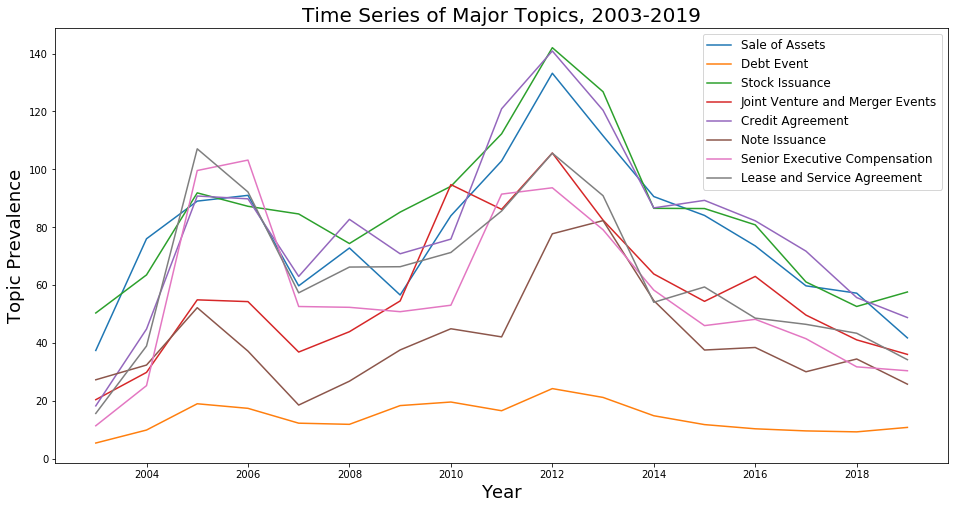

In [11]:
topics = ['Sale of Assets', 'Debt Event', 'Stock Issuance', 'Joint Venture and Merger Events',
          'Credit Agreement', 'Note Issuance', 'Senior Executive Compensation', 'Lease and Service Agreement']
fig, ax = plt.subplots(figsize = (16,8))
for topic in topics:
    x = df_topics_aggyear['year']
    y = df_topics_aggyear[topic]
    ax.plot(x, y, label=topic)
ax.legend(fontsize=12)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Topic Prevalence', fontsize=18)
plt.title('Time Series of Major Topics, 2003-2019', fontsize=20)
plt.show()

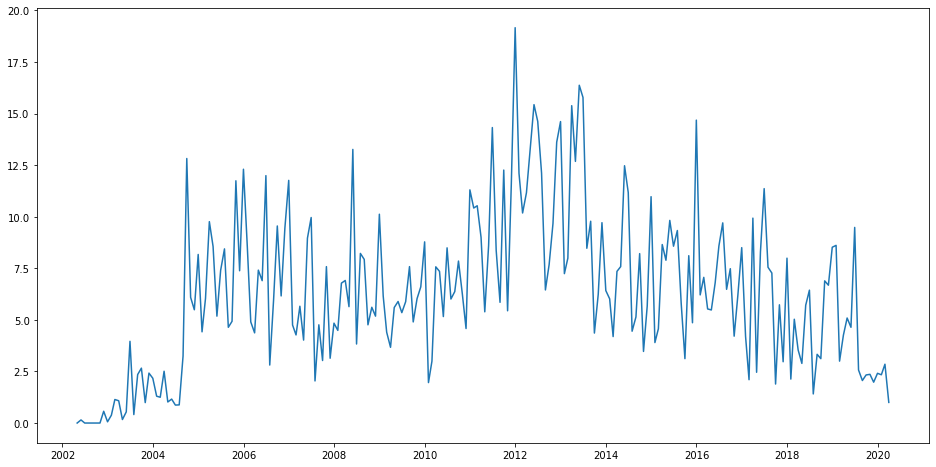

In [13]:
topics2 = ['Credit Agreement']
fig, ax = plt.subplots(figsize = (16,8))
for topic in topics2:
    x = df_topics_aggmonth.index
    y = df_topics_aggmonth[topic]
    ax.plot(x, y, label=topic)
# ax.legend(fontsize=12)
# plt.xlabel('Year', fontsize=18)
# plt.ylabel('Topic Prevalence', fontsize=18)
# plt.title('Time Series of Borrowing Events, 2003-2019', fontsize=20)
plt.show()

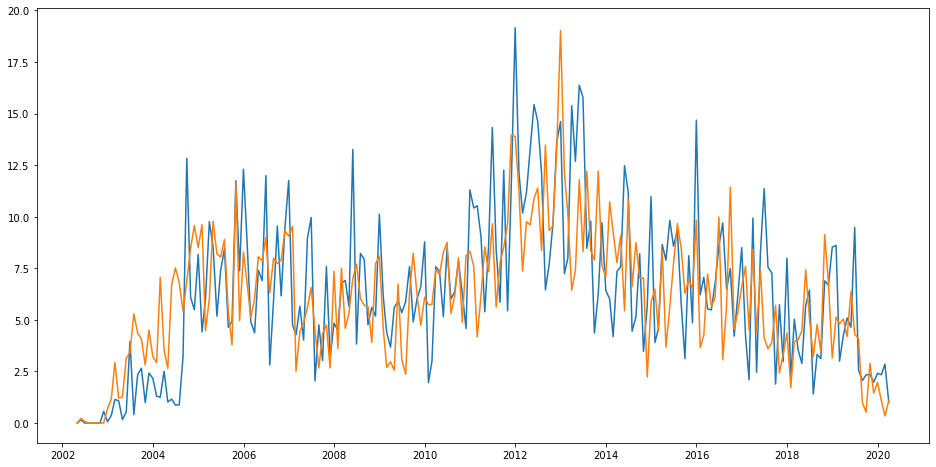

In [17]:
topics3 = ['Credit Agreement', 'Sale of Assets']
fig, ax = plt.subplots(figsize = (16,8))
for topic in topics3:
    x = df_topics_aggmonth.index
    y = df_topics_aggmonth[topic]
    ax.plot(x, y, label=topic)
# plt.xlim((df_topics_aggmonth.index.year(2003), df_topics_aggmonth.index.year(2019)))
# ax.legend(fontsize=12)
# plt.xlabel('Year', fontsize=18)
# plt.ylabel('Topic Prevalence', fontsize=18)
# plt.title('Time Series of Borrowing Events, 2003-2019', fontsize=20)
plt.show()